In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Average Toxicity Scores over Year Months

In [5]:
df = pd.read_csv('../data/combined_data_scores.csv')

In [6]:
monthly_agg = df.groupby('yearmonth').agg({
    'hatebert_toxicity_score': ['mean', 'std', 'count'],
    'hateXplain_toxicity_score': ['mean', 'std'],
    'toxicbert_toxicity_score': ['mean', 'std'],
    'average_toxicity_score': ['mean', 'std']
}).reset_index()

In [7]:
# Flatten column names
monthly_agg.columns = ['_'.join(col).strip('_') for col in monthly_agg.columns.values]

In [8]:
# Rename columns for clarity
monthly_agg = monthly_agg.rename(columns={
    'hatebert_toxicity_score_count': 'post_count'
})

In [9]:
# Display the results
print("\nPreprocessed dataset shape:", monthly_agg.shape)
print("\nColumns in preprocessed data:", monthly_agg.columns.tolist())
monthly_agg.head()


Preprocessed dataset shape: (46, 10)

Columns in preprocessed data: ['yearmonth', 'hatebert_toxicity_score_mean', 'hatebert_toxicity_score_std', 'post_count', 'hateXplain_toxicity_score_mean', 'hateXplain_toxicity_score_std', 'toxicbert_toxicity_score_mean', 'toxicbert_toxicity_score_std', 'average_toxicity_score_mean', 'average_toxicity_score_std']


,yearmonth,hatebert_toxicity_score_mean,hatebert_toxicity_score_std,post_count,hateXplain_toxicity_score_mean,hateXplain_toxicity_score_std,toxicbert_toxicity_score_mean,toxicbert_toxicity_score_std,average_toxicity_score_mean,average_toxicity_score_std
0,2020-01,0.064483,0.099303,74240,0.067799,0.100363,0.042783,0.033425,0.058355,0.052193
1,2020-02,0.063876,0.097027,83617,0.066380,0.097516,0.044662,0.033611,0.058306,0.051102
2,2020-03,0.064724,0.098804,94863,0.066061,0.096543,0.045630,0.033612,0.058805,0.050800
3,2020-04,0.066814,0.100887,121318,0.064658,0.095361,0.045772,0.033727,0.059081,0.051018
4,2020-05,0.065622,0.098629,99602,0.065117,0.096247,0.046404,0.033676,0.059048,0.050602


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

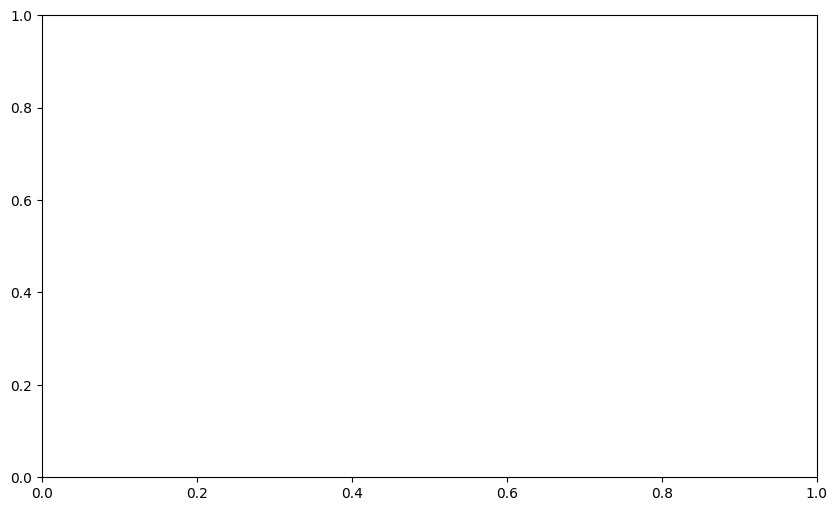

In [10]:
# Plotting
plt.figure(figsize=(10,6))
plt.plot(monthly_agg['yearmonth'], monthly_agg['average_toxicity_score_mean'], marker='o', linestyle='-')
plt.title('Average Toxicity Score Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Toxicity Score')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# Sort by highest average toxicity score
monthly_agg = monthly_agg.sort_values(by='average_toxicity_score_mean', ascending=False)
# View top 10 yearmonth with highest toxicity score
monthly_agg.head(10)

,yearmonth,hatebert_toxicity_score_mean,hatebert_toxicity_score_std,post_count,hateXplain_toxicity_score_mean,hateXplain_toxicity_score_std,toxicbert_toxicity_score_mean,toxicbert_toxicity_score_std,average_toxicity_score_mean,average_toxicity_score_std
45,2023-10,0.093986,0.150195,25919,0.106509,0.155725,0.033472,0.032050,0.077989,0.082865
31,2022-08,0.077114,0.121451,89706,0.085300,0.130115,0.040019,0.033203,0.067478,0.067091
30,2022-07,0.077611,0.123214,87716,0.085180,0.130585,0.039444,0.033220,0.067411,0.067932
39,2023-04,0.078861,0.123440,81593,0.080306,0.119020,0.040950,0.033378,0.066706,0.063723
29,2022-06,0.076285,0.121302,85223,0.081693,0.124104,0.039151,0.033076,0.065710,0.065432


In [ ]:
# Basic statistics of the preprocessed data
monthly_agg.describe()

In [ ]:
monthly_agg.to_csv('../data/monthly_scores_summary.csv', index=False)

# Topic Visualisation

In [6]:
topics_2023 = pd.read_csv('../data/topics_2023.csv')
# Filter out outlier topic
oct_2023 = topics_2023[(topics_2023['yearmonth'] == '2023-10') & (topics_2023['Topic'] != -1)]

In [ ]:
# Sort by average toxicity score in descending order
oct_2023 = oct_2023.sort_values(by='average_toxicity_score', ascending=False)
oct_2023.head()

,text,yearmonth,title,index,average_toxicity_score,Topic,Count,Name,Representation,Representative_Docs
795304,Another typical India p4ria lusting for chines...,2023-10,jail caning for cleaner who stalked undergrad at,4501914,0.619092,0,2271,0_gaza_palestinians_hamas_palestinian,"['gaza', 'palestinians', 'hamas', 'palestinian...","[""Hey maybe if they stopped wanting to kill ev..."
786599,Better dump that gullible retard before he get...,2023-10,old aunty coercing us to sleepover at her house,4493209,0.613692,21,111,21_bf_boyfriend_relationship_his,"['bf', 'boyfriend', 'relationship', 'his', 'hu...","[""Men like this will literally put your life i..."
777069,"Stupid white trash, women only cabin do not st...",2023-10,wokeupsg wants us to follow bolehland to have,4483679,0.612662,225,14,225_cabin_males_gender_men,"['cabin', 'males', 'gender', 'men', 'patriarch...",[' There should be male only cabin for the saf...
790842,"Sinkie parents suck at teaching kids anyway, b...",2023-10,are youth today just plain mentally ill,4497452,0.604400,17,130,17_sinkie_sinkies_sinkieland_sinking,"['sinkie', 'sinkies', 'sinkieland', 'sinking',...","['same old sinkie pwn sinkie mindset.', 'sinki..."
780267,"These white scums all stay in big house, you t...",2023-10,2019 30 to teach you save water 2023 another 18,4486877,0.602809,11,230,11_tables_wipe_wiping_table,"['tables', 'wipe', 'wiping', 'table', 'wipes',...","['""If you dirty the table, then you need to wi..."


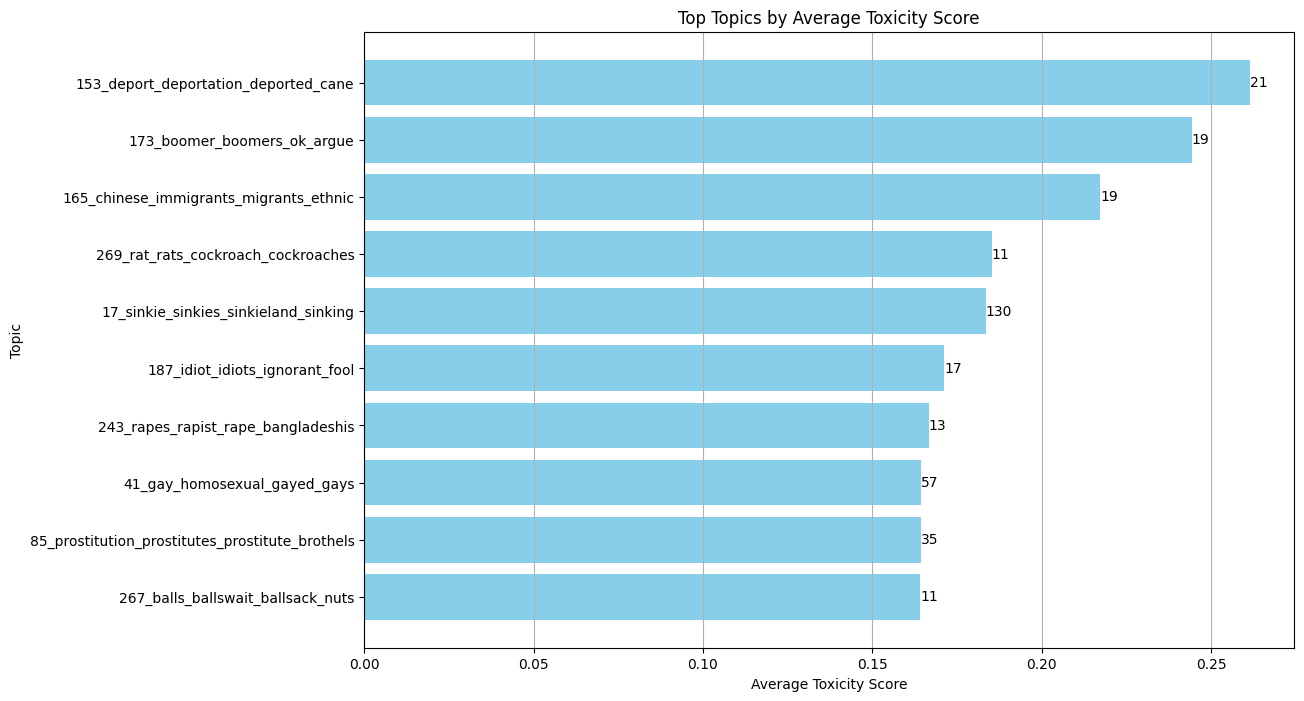

In [8]:
# Group by 'Topic' and calculate the mean toxicity score
topic_toxicity = oct_2023.groupby('Name').agg({'average_toxicity_score': 'mean', 'Count': 'max'}).reset_index()

# Sort by average toxicity score in descending order and select the top topics
top_topics = topic_toxicity.sort_values(by='average_toxicity_score', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_topics['Name'], top_topics['average_toxicity_score'], color='skyblue')
plt.title('Top Topics by Average Toxicity Score')
plt.ylabel('Topic')
plt.xlabel('Average Toxicity Score')

# Add count as bar label
for index, value in enumerate(top_topics['average_toxicity_score']):
    plt.text(value, index, str(top_topics['Count'].iloc[index]), ha='left', va='center')
plt.gca().invert_yaxis()
plt.grid(axis='x')
#plt.tight_layout()
plt.show()

In [5]:
# Find topics with the highest toxicity score in 2020
topics_2020 = pd.read_csv('../data/topics_2020.csv')
# Filter out outlier topic
topics_2020 = topics_2020[(topics_2020['Topic'] != -1)]
topics_2020.head()
# Group by 'Topic' and calculate the mean toxicity score
topic_toxicity = topics_2020.groupby('Name').agg({'average_toxicity_score': 'mean', 'Count': 'max'}).reset_index()
# Sort by average toxicity score in descending order
top_topics = topic_toxicity.sort_values(by='average_toxicity_score', ascending=False)